In [41]:
import os 
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import sim functions
from neurodsp.sim.combined import sim_combined, sim_peak_oscillation
from neurodsp.sim.aperiodic import sim_powerlaw
from neurodsp.utils import set_random_seed

# Import function to compute power spectra
from neurodsp.spectral import compute_spectrum

# Import utilities for plotting data
from neurodsp.utils import create_times
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

In [42]:
# Set some general settings, to be used across all simulations
num_signals = 1000
fs = 2000 #sampling 주파수
n_seconds = 2 #simulation 지속시간
times = create_times(n_seconds, fs) #시간 백터

# Define the components of the combined signal to simulate
n_neurons_range = (800, 1200)  # range for number of neurons
firing_rate_range = (2, 4)     # range for firing rate
t_ker_range = (0.8, 1.2)       # range for t_ker
tau_r_range = (0.001, 0.003)   # range for tau_r
tau_d_range = (0.015, 0.025)   # range for tau_d
freq_range = (15, 25)          # range for oscillation frequency
amplitude_range = (5,6)   # range for amplitude_range

# Sample values from the specified ranges
n_neurons = np.random.randint(n_neurons_range[0], n_neurons_range[1] + 1)
firing_rate = np.random.uniform(firing_rate_range[0], firing_rate_range[1])
t_ker = np.random.uniform(t_ker_range[0], t_ker_range[1])
tau_r = np.random.uniform(tau_r_range[0], tau_r_range[1])
tau_d = np.random.uniform(tau_d_range[0], tau_d_range[1])
freq = np.random.uniform(freq_range[0], freq_range[1])

# 초기 (0, 4000) 크기의 빈 numpy 배열 생성
set_shape_2d = np.zeros((0, len(times)))
# 초기 (4000, ) 크기의 빈 numpy 배열 생성
set_shape_1d = np.zeros(len(times))

# -------- < original signal data > ------------------------------------------------

data_signal = set_shape_2d.copy()

# -------- < artifact data - shape > ------------------------------------------------

data_sine = set_shape_2d.copy()
data_triangle = set_shape_2d.copy()
data_square = set_shape_2d.copy()

# -------- < artifact data - apply varying > ------------------------------------------------

data_sine_varying = set_shape_2d.copy()
data_triangle_varying = set_shape_2d.copy()
data_square_varying = set_shape_2d.copy()

# -------- < artifact data - apply pattern > ------------------------------------------------

data_pattern_regular = set_shape_2d.copy()
data_pattern_non_regular = set_shape_2d.copy()

# -------- < synthesized data - sum > ------------------------------------------------

data_signal_with_sine = set_shape_2d.copy()
data_signal_with_triangle = set_shape_2d.copy()
data_signal_with_square = set_shape_2d.copy()

# -------- < synthesized data - varying > ------------------------------------------------

data_signal_with_sine_varying = set_shape_2d.copy()
data_signal_with_triangle_varying = set_shape_2d.copy()
data_signal_with_square_varying = set_shape_2d.copy()

# -------- < synthesized data - apply pattern > ------------------------------------------------

data_signal_with_sine_regular_pattern = data_signal.copy()
data_signal_with_triangle_regular_pattern = data_signal.copy()
data_signal_with_square_regular_pattern = data_signal.copy()

data_signal_with_sine_varying_regular_pattern = data_signal.copy()
data_signal_with_triangle_varying_regular_pattern = data_signal.copy()
data_signal_with_square_varying_regular_pattern = data_signal.copy()

data_signal_with_sine_non_regular_pattern = data_signal.copy()
data_signal_with_triangle_non_regular_pattern = data_signal.copy()
data_signal_with_square_non_regular_pattern = data_signal.copy()

data_signal_with_sine_varying_non_regular_pattern = data_signal.copy()
data_signal_with_triangle_varying_non_regular_pattern = data_signal.copy()
data_signal_with_square_varying_non_regular_pattern = data_signal.copy()


In [43]:
# ---------------------- << 생성 - data_signal >> ----------------------------------------------------------------------------------------------------------

for idx in range(num_signals):
   components = {
      'sim_synaptic_current': {
      'n_neurons': n_neurons,
      'firing_rate': firing_rate,
      't_ker': t_ker,
      'tau_r': tau_r,
      'tau_d': tau_d
      },
      'sim_oscillation': {
      'freq': freq
      }
   }
   # Simulate an oscillation over an aperiodic component
   signal = sim_combined(n_seconds, fs, components)
   
   # Generate artifact
   amplitude = np.random.uniform(amplitude_range[0], amplitude_range[1])
   frequency = 130
   period = 1/frequency
   num_cycles = int(np.ceil(times[-1] / period))

   data_signal = np.vstack((data_signal, signal)) # (1000, 4000)


Text(0.5, 1.0, 'data_signal')

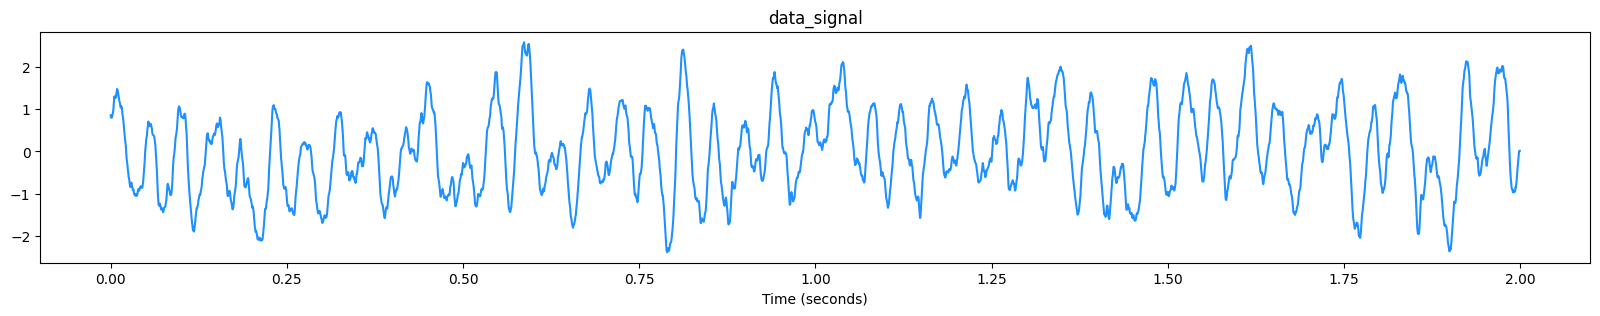

In [56]:
# 확대할 구간 설정
plt.figure(figsize=(20, 3))

plt.plot(times, data_signal[1, :], label = 'data signal', c='dodgerblue')
plt.xlabel("Time (seconds)")
plt.title('data_signal')

In [44]:
# ------------------------------------<< 생성 - normal wave >>------------------------------------------------------------------------------------------
# triangle_wave = set_shape_1d.copy()

for idx in range(num_signals):
   # Generate a 130 Hz sine wave
   sine_wave = amplitude * np.sin(2 * np.pi * frequency * times)

   # Generate a 130 Hz triangle wave 
   triangle_wave = amplitude * (2 * np.abs(2 * (times * frequency - np.floor(times * frequency + 0.5))) - 1)
   # triangle_wave = amplitude * (2 * abs(2 * (times * frequency - np.floor(times * frequency + 0.5))) - 1)
   # for i in range(len(times)):
   #  t = times[i]
   #  cycle_pos = (t * frequency) % 1  # 주기 내 위치
   #  if cycle_pos < 0.5:
   #      triangle_wave[i] = 4 * cycle_pos - 1  # 상승 구간
   #  else:
   #      triangle_wave[i] = -4 * cycle_pos + 3  # 하강 구간

   # Generate a 130 Hz square wave
   square_wave = amplitude * np.sign(np.sin(2 * np.pi * frequency* times))

   data_sine = np.vstack((data_sine, sine_wave))
   data_triangle = np.vstack((data_triangle, triangle_wave))
   data_square = np.vstack((data_square, square_wave))

print("data_sine shape:", data_sine.shape)
print("data_triangle shape:", data_triangle.shape)
print("data_square shape:", data_square.shape)

data_sine shape: (1000, 4000)
data_triangle shape: (1000, 4000)
data_square shape: (1000, 4000)


Text(0.5, 1.0, 'data_square')

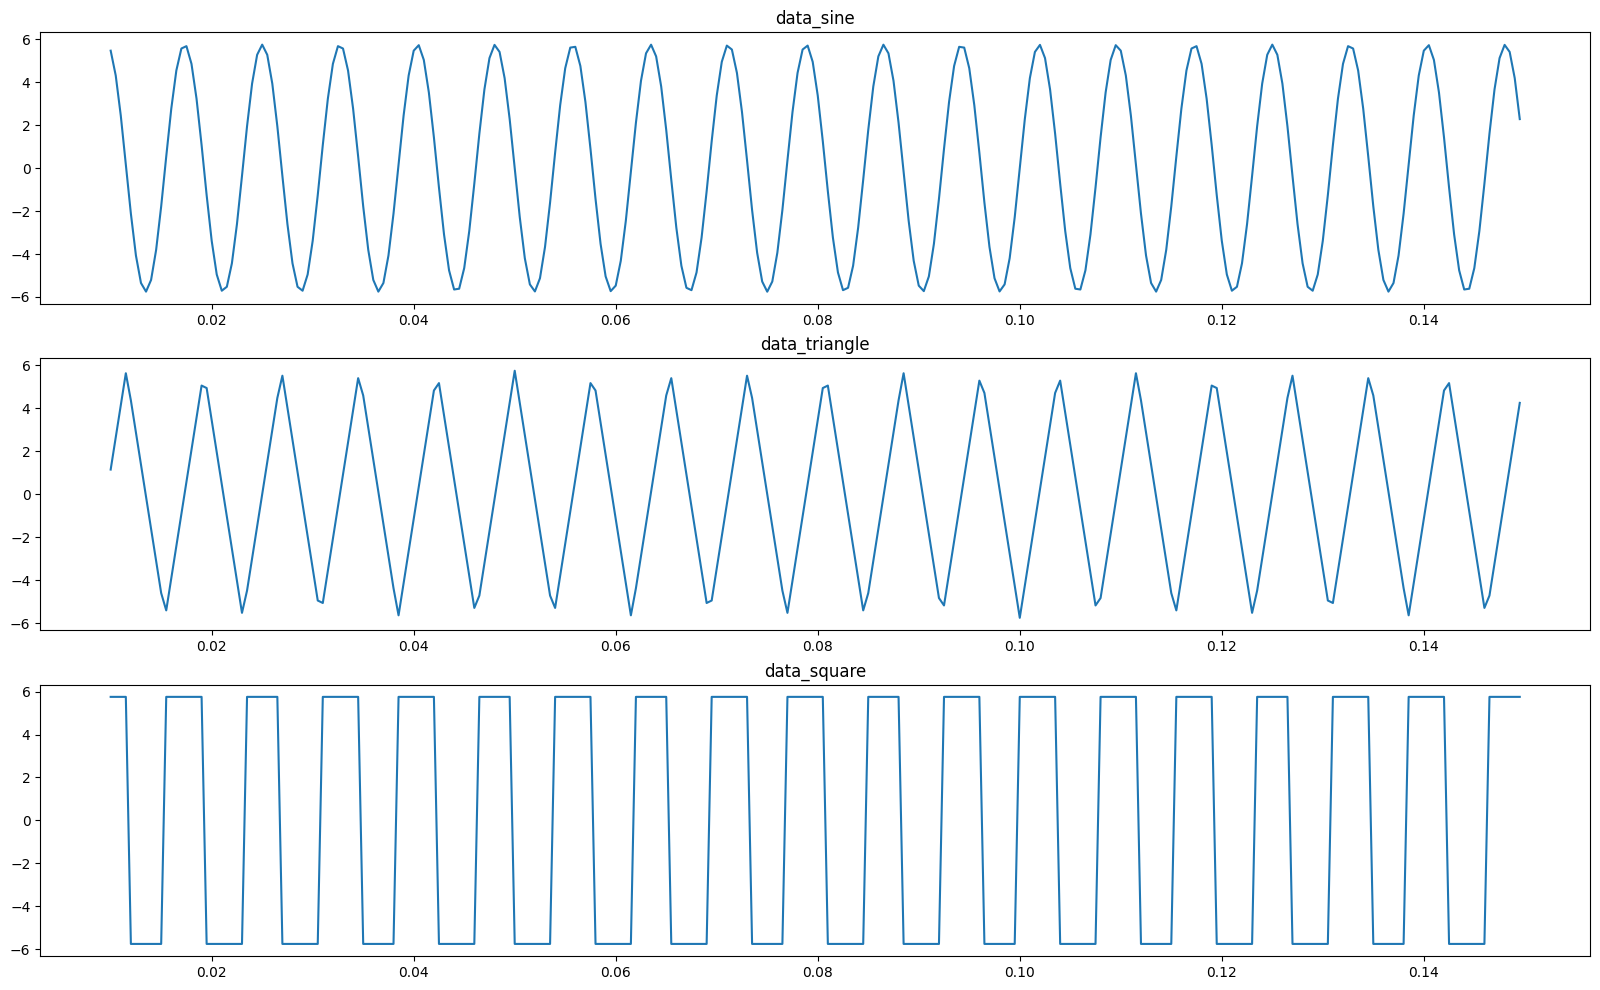

In [45]:
# 확대할 구간 설정
start_time = 0.01
end_time = 0.15
start_idx_g = np.searchsorted(times, start_time)
end_idx_g = np.searchsorted(times, end_time)

plt.figure(figsize=(20, 12))

plt.subplot(3,1,1)
plt.plot(times[start_idx_g:end_idx_g], data_sine[1, start_idx_g:end_idx_g])
plt.title('data_sine')

plt.subplot(3,1,2)
plt.plot(times[start_idx_g:end_idx_g], data_triangle[1, start_idx_g:end_idx_g])
plt.title('data_triangle')

plt.subplot(3,1,3)
plt.plot(times[start_idx_g:end_idx_g], data_square[1, start_idx_g:end_idx_g])
plt.title('data_square')


In [46]:
# ------------------------------------<< 생성 - varying wave >>------------------------------------------------------------------------------------------
# 재현성을 위해 시드 설정
np.random.seed(0)
random_amplitudes = np.random.uniform(amplitude-5, amplitude+5, num_cycles)
n_seconds = num_cycles * period

# data_sine_varying = set_shape_2d.copy()
# data_triangle_varying = set_shape_2d.copy()
# data_square_varying = set_shape_2d.copy() 

for idx in range(num_signals):
   sine_varying = set_shape_1d.copy()
   triangle_varying = set_shape_1d.copy()
   square_varying = set_shape_1d.copy()

   for i in range(num_cycles):
      start_idx = int(i * period * len(times) / n_seconds)
      end_idx = int((i + 1) * period * len(times) / n_seconds)
      cycle_t = times[start_idx:end_idx] - times[start_idx]

      sine_varying[start_idx:end_idx] = random_amplitudes[i] * np.sin(2 * np.pi * frequency * cycle_t)

      # cycle_wave = random_amplitudes[i] * 2 * np.abs(2 * (cycle_t * frequency - np.floor(cycle_t * frequency + 0.5))) - random_amplitudes[i]
      # triangle_varying[start_idx:end_idx] = cycle_wave[:end_idx - start_idx]

      triangle_varying[start_idx:end_idx] = random_amplitudes[i] * (2 * np.abs(2 * (cycle_t * frequency - np.floor(cycle_t * frequency + 0.5))) - 1)

      # cycle_wave =  random_amplitudes[i] * np.sign(np.sin(2 * np.pi * frequency * cycle_t))
      # square_varying[start_idx:end_idx] = cycle_wave[:end_idx - start_idx]

      square_varying[start_idx:end_idx] = random_amplitudes[i] * np.sign(np.sin(2 * np.pi * frequency * cycle_t))
      
   # print(f"Signal {idx + 1}/{num_signals} generated.")

   data_sine_varying = np.vstack((data_sine_varying, sine_varying))
   data_triangle_varying = np.vstack((data_triangle_varying, triangle_varying))
   data_square_varying = np.vstack((data_square_varying, square_varying))

   # print(f"data_sine_varying shape: {data_sine_varying.shape}")
   # print(f"data_triangle_varying shape: {data_triangle_varying.shape}")
   # print(f"data_square_varying shape: {data_square_varying.shape}")

# 디버깅을 위해 결과 출력
print("data_sine_varying shape:", data_sine_varying.shape)
print("data_triangle_varying shape:", data_triangle_varying.shape)
print("data_square_varying shape:", data_square_varying.shape)

data_sine_varying shape: (1000, 4000)
data_triangle_varying shape: (1000, 4000)
data_square_varying shape: (1000, 4000)


Text(0.5, 1.0, 'data_square_varying')

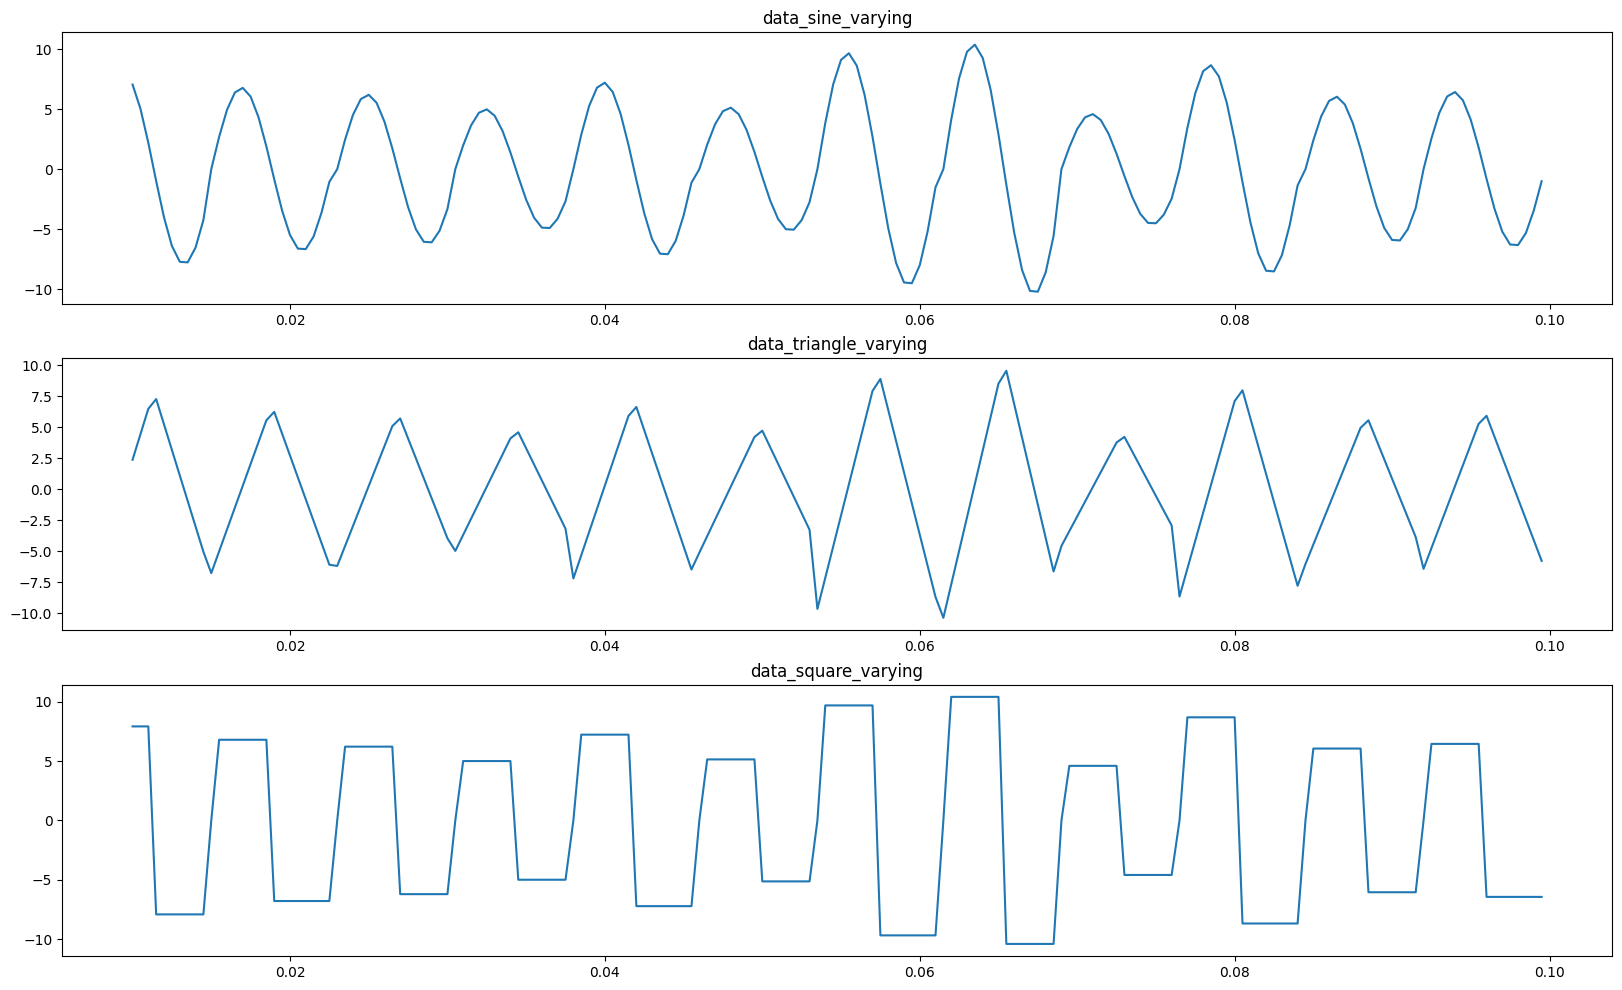

In [47]:
plt.figure(figsize=(20, 12))
#  확대할 구간 설정
start_time = 0.01
end_time = 0.10
start_idx_g = np.searchsorted(times, start_time)
end_idx_g = np.searchsorted(times, end_time)

plt.subplot(3,1,1)
plt.plot(times[start_idx_g:end_idx_g], data_sine_varying[1, start_idx_g:end_idx_g])
plt.title('data_sine_varying')

plt.subplot(3,1,2)
plt.plot(times[start_idx_g:end_idx_g], data_triangle_varying[1, start_idx_g:end_idx_g])
plt.title('data_triangle_varying')

plt.subplot(3,1,3)
plt.plot(times[start_idx_g:end_idx_g], data_square_varying[1, start_idx_g:end_idx_g])
plt.title('data_square_varying')


In [48]:
# ------------------------------------< on-off set pattern 생성 >------------------------------------------------------------------------------------------
# 2 sec = 4000 <=> 1 sec = 2000, 100 = 0.05 sec
off_range = 100

###### On-Off set version1; regular pattern #####
for idx in range(num_signals):
   pattern = set_shape_1d.copy()
   for i in range(0, len(times), off_range*2):
      pattern[i:i+off_range] = 1

   pattern = pattern.astype(int)
   data_pattern_regular = np.vstack((data_pattern_regular, pattern))

###### On-Off set version2; Non-regular pattern #####
num_off_set = 20 # off block 갯수

for idx in range(num_signals):
   pattern = set_shape_1d.copy()

   # condition setting
   points = np.arange(0, len(times) - off_range +1, off_range) # 시작점 범위
   selected_points = np.random.choice(points, num_off_set, replace = False) # 겹치지 않게 선택

   if len(selected_points) < num_off_set:
      raise ValueError("num_off_set이 available_points보다 큽니다. off_range를 줄이거나 num_off_set를 줄이세요.")

   for i in selected_points:
      pattern[i:i+off_range] = 1

   pattern = pattern.astype(int)
   data_pattern_non_regular = np.vstack((data_pattern_non_regular, pattern))

# 디버깅을 위해 결과 출력
print("data_pattern_regular shape:", data_pattern_regular.shape)
print("data_pattern_non_regular shape:", data_pattern_non_regular.shape)

data_pattern_regular shape: (1000, 4000)
data_pattern_non_regular shape: (1000, 4000)


Text(0.5, 1.0, 'data_pattern_non_regular')

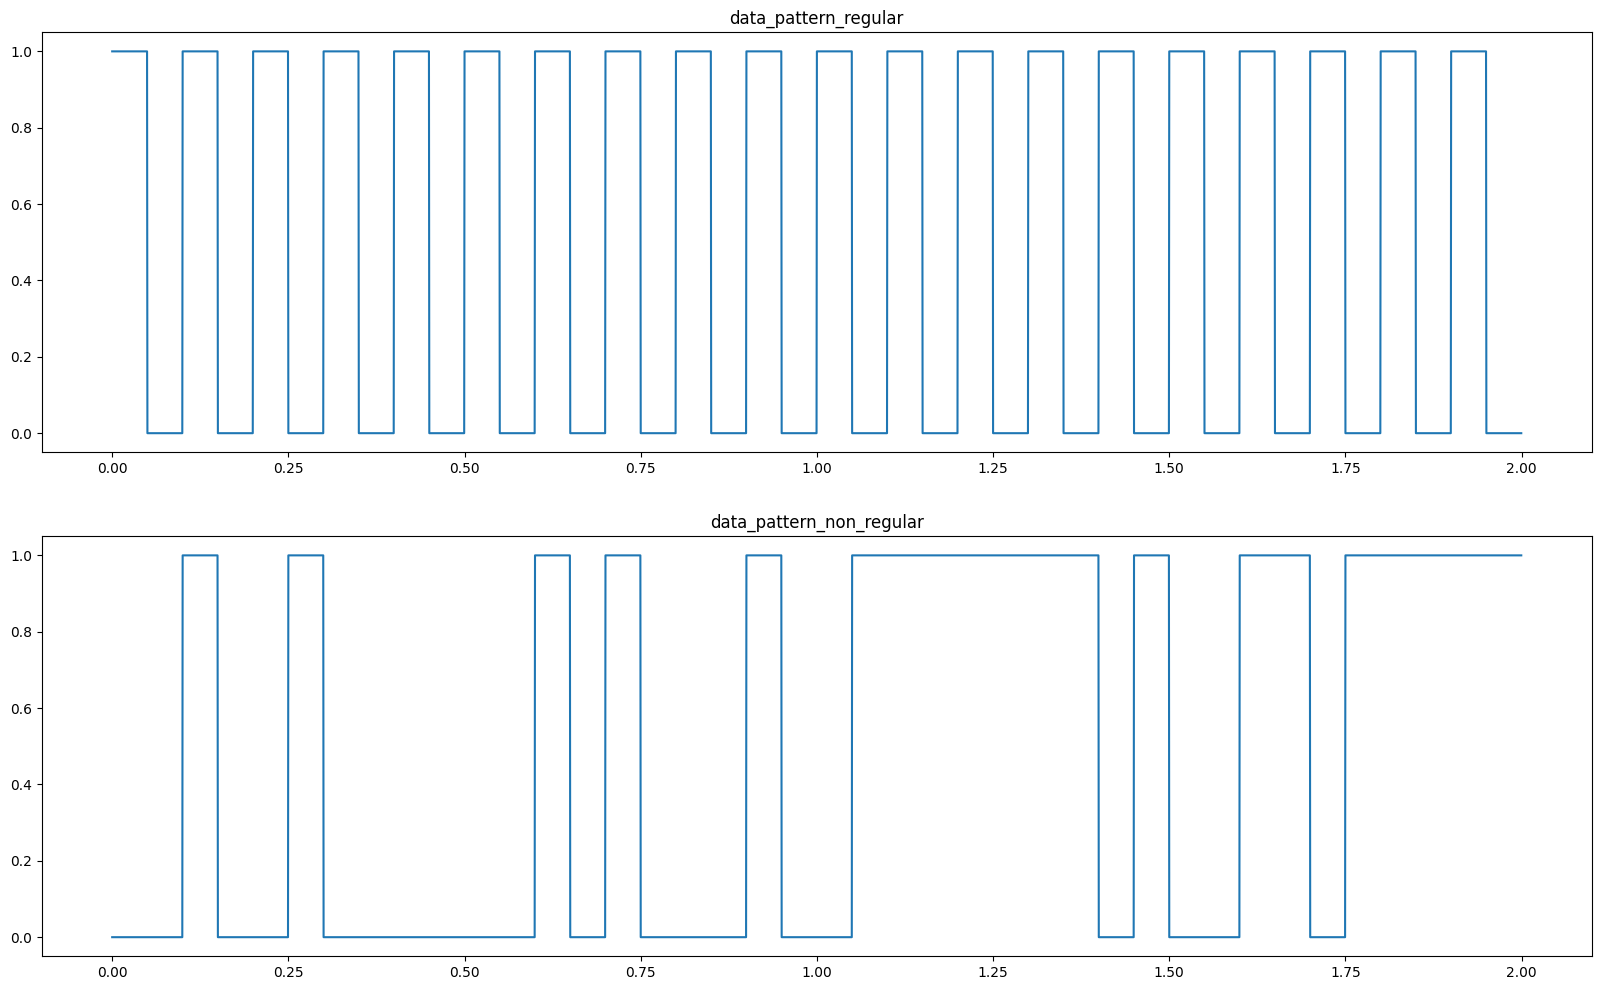

In [49]:
plt.figure(figsize=(20, 12))

plt.subplot(2,1,1)
plt.plot(times, data_pattern_regular[1, :])
plt.title('data_pattern_regular')

plt.subplot(2,1,2)
plt.plot(times, data_pattern_non_regular[1, :])
plt.title('data_pattern_non_regular')

In [50]:
# -------- << 적용 >> ------------------------------------------------

# -------- < synthesized data - sum > ------------------------------------------------

data_signal_with_sine = data_signal + data_sine
data_signal_with_triangle = data_signal + data_triangle
data_signal_with_square = data_signal + data_square

# -------- < synthesized data - varying > ------------------------------------------------

data_signal_with_sine_varying = data_signal + data_sine_varying
data_signal_with_triangle_varying = data_signal + data_triangle_varying
data_signal_with_square_varying = data_signal + data_square_varying

# -------- < synthesized data - apply pattern > ------------------------------------------------

data_signal_with_sine_regular_pattern = data_signal + data_sine * data_pattern_regular
data_signal_with_triangle_regular_pattern = data_signal + data_triangle * data_pattern_regular
data_signal_with_square_regular_pattern = data_signal + data_square * data_pattern_regular

data_signal_with_sine_varying_regular_pattern = data_signal + data_sine_varying * data_pattern_regular
data_signal_with_triangle_varying_regular_pattern = data_signal + data_triangle_varying * data_pattern_regular
data_signal_with_square_varying_regular_pattern = data_signal + data_square_varying * data_pattern_regular

data_signal_with_sine_non_regular_pattern = data_signal + data_sine * data_pattern_non_regular
data_signal_with_triangle_non_regular_pattern = data_signal + data_triangle * data_pattern_non_regular
data_signal_with_square_non_regular_pattern = data_signal + data_square * data_pattern_non_regular

data_signal_with_sine_varying_non_regular_pattern = data_signal + data_sine_varying * data_pattern_non_regular
data_signal_with_triangle_varying_non_regular_pattern = data_signal + data_triangle_varying * data_pattern_non_regular
data_signal_with_square_varying_non_regular_pattern = data_signal + data_square_varying * data_pattern_non_regular

# # 디버깅을 위해 결과 출력
# # -------- < synthesized data - sum > ------------------------------------------------
# print("data_signal_with_sine shape:", data_signal_with_sine.shape)
# print("data_signal_with_triangle shape:", data_signal_with_triangle.shape)
# print("data_signal_with_square shape:", data_signal_with_square.shape)

# # -------- < synthesized data - varying > ------------------------------------------------
# print("data_signal_with_sine_varying shape:", data_signal_with_sine_varying.shape)
# print("data_signal_with_triangle_varying shape:", data_signal_with_triangle_varying.shape)
# print("data_signal_with_square_varying shape:", data_signal_with_square_varying.shape)

# # -------- < synthesized data - apply pattern > ------------------------------------------------
# print("data_signal_with_sine_varying_regular_pattern shape:", data_signal_with_sine_regular_pattern.shape)
# print("data_signal_with_triangle_varying_regular_pattern shape:", data_signal_with_triangle_regular_pattern.shape)
# print("data_signal_with_square_regular_pattern shape:", data_signal_with_square_regular_pattern.shape)

# print("data_signal_with_sine_non_regular_patter shape:", data_signal_with_sine_varying_regular_pattern.shape)
# print("data_signal_with_triangle_non_regular_pattern shape:", data_signal_with_triangle_varying_regular_pattern.shape)
# print("data_signal_with_square_varying shape:", data_signal_with_square_varying_regular_pattern.shape)

# print("data_signal_with_sine_non_regular_patter shape:", data_signal_with_sine_non_regular_pattern.shape)
# print("data_signal_with_triangle_non_regular_pattern shape:", data_signal_with_triangle_non_regular_pattern.shape)
# print("data_signal_with_square_non_regular_pattern shape:", data_signal_with_square_non_regular_pattern.shape)

# print("data_signal_with_sine_varying_non_regular_pattern shape:", data_signal_with_sine_varying_non_regular_pattern.shape)
# print("data_signal_with_triangle_varying_non_regular_pattern shape:", data_signal_with_triangle_varying_non_regular_pattern.shape)
# print("data_signal_with_square_varying_non_regular_pattern shape:", data_signal_with_square_varying_non_regular_pattern.shape)


Text(0.5, 1.0, 'data_signal_with_square')

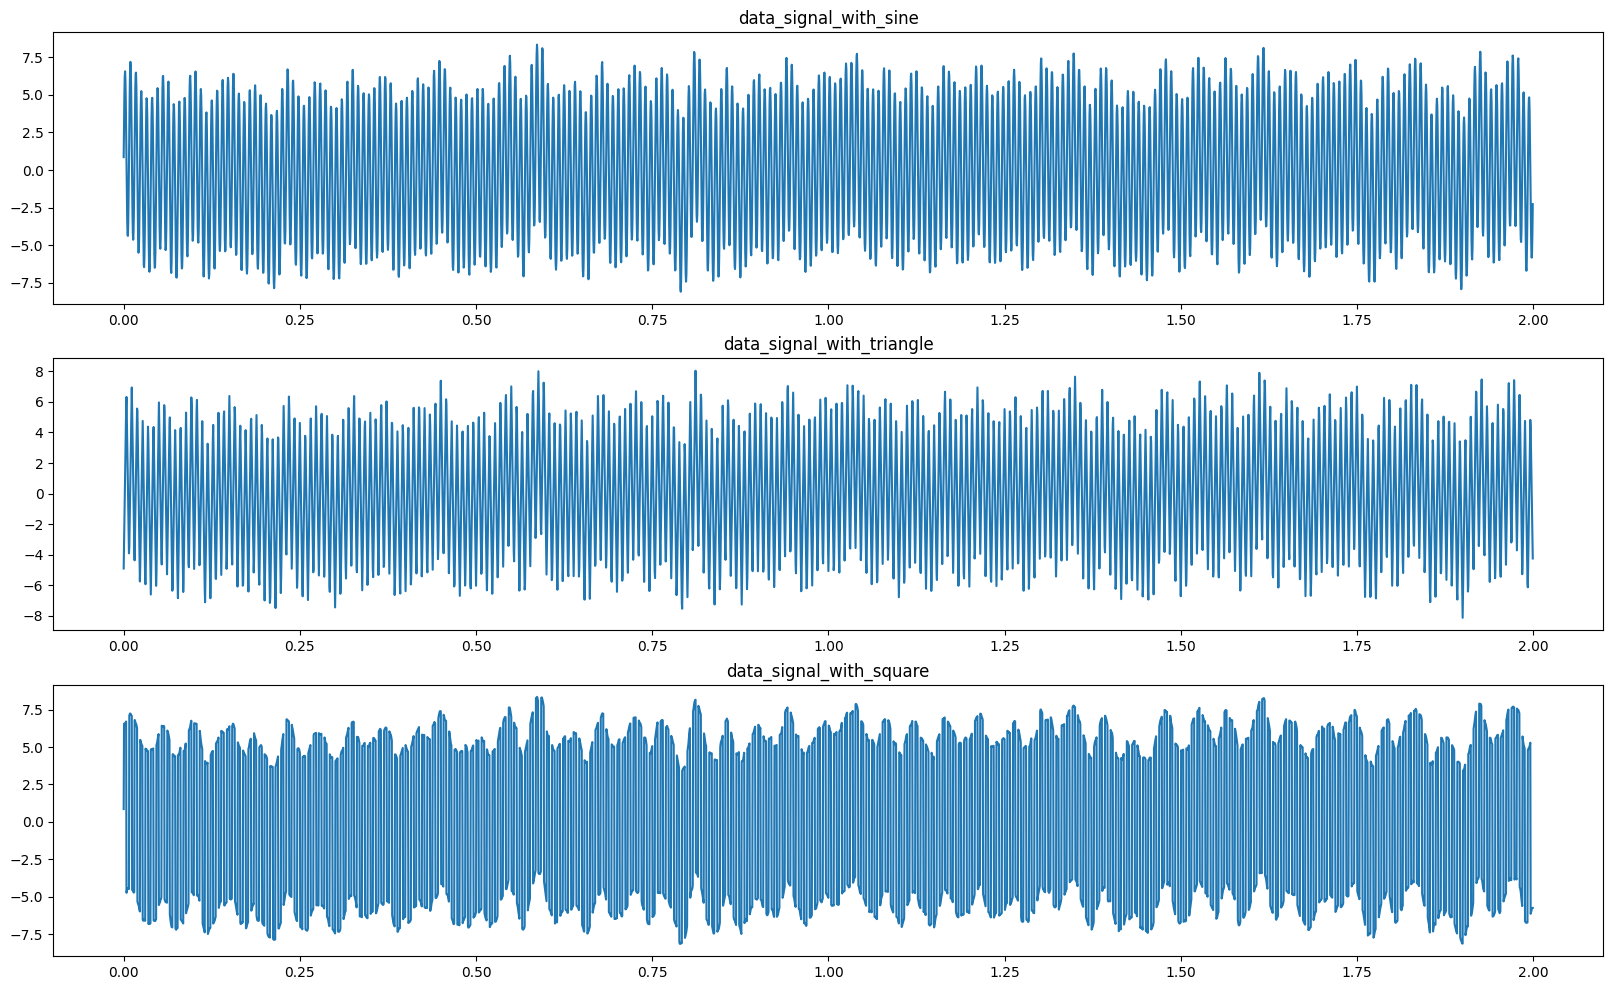

In [51]:
# -------- < synthesized data - sum > ------------------------------------------------
plt.figure(figsize=(20, 12))

plt.subplot(3,1,1)
plt.plot(times, data_signal_with_sine[1, :])
plt.title('data_signal_with_sine')

plt.subplot(3,1,2)
plt.plot(times, data_signal_with_triangle[1, :])
plt.title('data_signal_with_triangle')

plt.subplot(3,1,3)
plt.plot(times, data_signal_with_square[1, :])
plt.title('data_signal_with_square')

Text(0.5, 1.0, 'data_signal_with_square_varying')

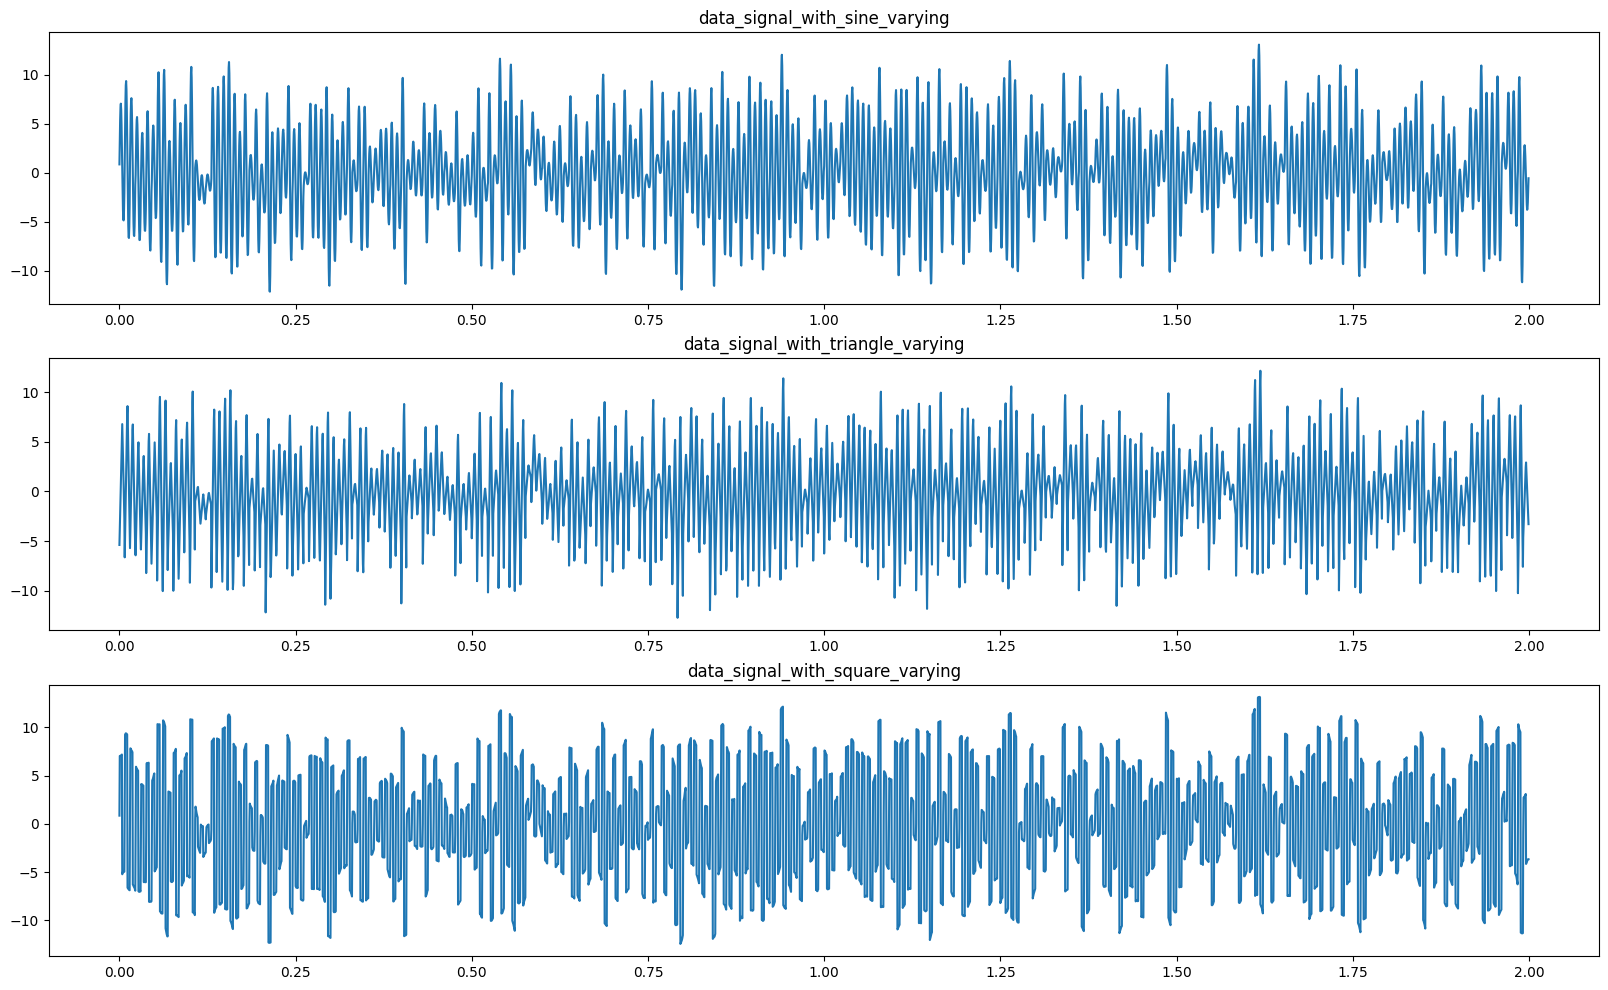

In [52]:
# -------- < synthesized data - varying > ------------------------------------------------
plt.figure(figsize=(20, 12))

plt.subplot(3,1,1)
plt.plot(times, data_signal_with_sine_varying[1, :])
plt.title('data_signal_with_sine_varying')

plt.subplot(3,1,2)
plt.plot(times, data_signal_with_triangle_varying[1, :])
plt.title('data_signal_with_triangle_varying')

plt.subplot(3,1,3)
plt.plot(times, data_signal_with_square_varying[1, :])
plt.title('data_signal_with_square_varying')

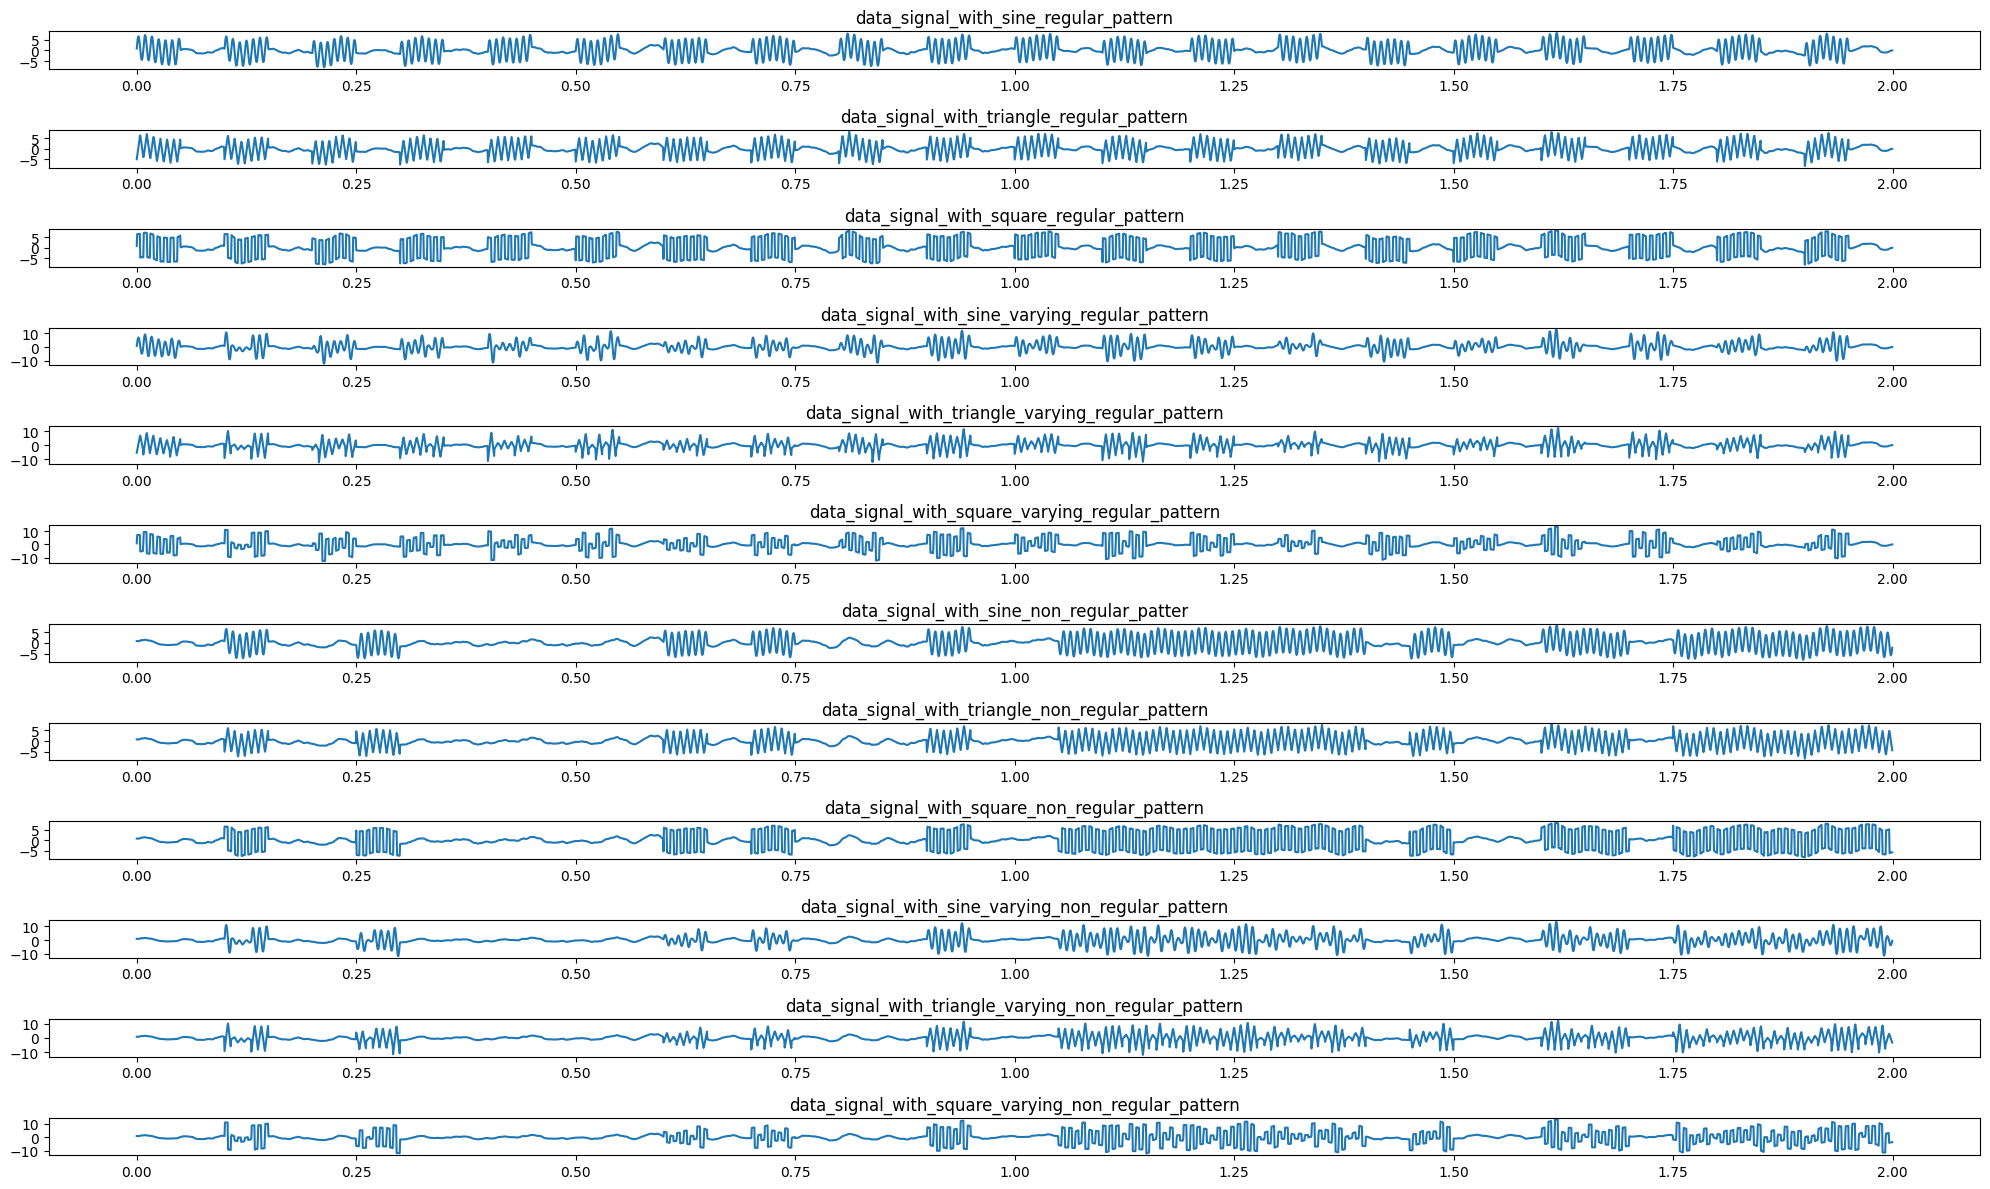

In [53]:
# -------- < synthesized data - apply pattern > ------------------------------------------------
plt.figure(figsize=(20, 12))

plt.subplot(12,1,1)
plt.plot(times, data_signal_with_sine_regular_pattern[1, :])
plt.title('data_signal_with_sine_regular_pattern')

plt.subplot(12,1,2)
plt.plot(times, data_signal_with_triangle_regular_pattern[1, :])
plt.title('data_signal_with_triangle_regular_pattern')

plt.subplot(12,1,3)
plt.plot(times, data_signal_with_square_regular_pattern[1, :])
plt.title('data_signal_with_square_regular_pattern')

plt.subplot(12,1,4)
plt.plot(times, data_signal_with_sine_varying_regular_pattern[1, :])
plt.title('data_signal_with_sine_varying_regular_pattern')

plt.subplot(12,1,5)
plt.plot(times, data_signal_with_triangle_varying_regular_pattern[1, :])
plt.title('data_signal_with_triangle_varying_regular_pattern')

plt.subplot(12,1,6)
plt.plot(times, data_signal_with_square_varying_regular_pattern[1, :])
plt.title('data_signal_with_square_varying_regular_pattern')

plt.subplot(12,1,7)
plt.plot(times, data_signal_with_sine_non_regular_pattern[1, :])
plt.title('data_signal_with_sine_non_regular_patter')

plt.subplot(12,1,8)
plt.plot(times, data_signal_with_triangle_non_regular_pattern[1, :])
plt.title('data_signal_with_triangle_non_regular_pattern')

plt.subplot(12,1,9)
plt.plot(times, data_signal_with_square_non_regular_pattern[1, :])
plt.title('data_signal_with_square_non_regular_pattern')

plt.subplot(12,1,10)
plt.plot(times, data_signal_with_sine_varying_non_regular_pattern[1, :])
plt.title('data_signal_with_sine_varying_non_regular_pattern')

plt.subplot(12,1,11)
plt.plot(times, data_signal_with_triangle_varying_non_regular_pattern[1, :])
plt.title('data_signal_with_triangle_varying_non_regular_pattern')

plt.subplot(12,1,12)
plt.plot(times, data_signal_with_square_varying_non_regular_pattern[1, :])
plt.title('data_signal_with_square_varying_non_regular_pattern')

plt.tight_layout()


In [54]:
# -------- < 저장 > ------------------------------------------------

fpath = "C:/Users/stell/UGRP_Github_desktop/UGRP/data/synthetic_data/"
    
# -------- < original signal data > ------------------------------------------------

np.save(fpath + "clean_data" + ".npy", data_signal)

# # -------- < artifact data - shape > ------------------------------------------------

# np.save(fpath + "data_sine" + ".npy", data_sine)
# np.save(fpath + "data_triangle" + ".npy", data_triangle)
# np.save(fpath + "data_square" + ".npy", data_square)

# # -------- < artifact data - apply varying > ------------------------------------------------

# np.save(fpath + "data_sine_varying" + ".npy", data_sine_varying)
# np.save(fpath + "data_triangle_varying" + ".npy", data_triangle_varying)
# np.save(fpath + "data_square_varying" + ".npy", data_square_varying)

# # -------- < artifact data - apply pattern > ------------------------------------------------

# np.save(fpath + "data_pattern_regular" + ".npy", data_pattern_regular)
# np.save(fpath + "data_pattern_non_regular" + ".npy", data_pattern_non_regular)

# -------- < synthesized data - sum > ------------------------------------------------

np.save(fpath + "contaminated_by_sine" + ".npy", data_signal_with_sine)
np.save(fpath + "contaminated_by_triangle" + ".npy", data_signal_with_triangle)
np.save(fpath + "contaminated_by_square" + ".npy", data_signal_with_square)

# -------- < synthesized data - varying > ------------------------------------------------

np.save(fpath + "contaminated_by_sine_randamplitude" + ".npy", data_signal_with_sine_varying)
np.save(fpath + "contaminated_by_triangle_randamplitude" + ".npy", data_signal_with_triangle_varying)
np.save(fpath + "contaminated_by_square_randamplitude" + ".npy", data_signal_with_square_varying)

# -------- < synthesized data - apply pattern > ------------------------------------------------

np.save(fpath + "contaminated_by_sine_onoff" + ".npy", data_signal_with_sine_regular_pattern)
np.save(fpath + "contaminated_by_triangle_onoff" + ".npy", data_signal_with_triangle_regular_pattern)
np.save(fpath + "contaminated_by_square_onoff" + ".npy", data_signal_with_square_regular_pattern)

np.save(fpath + "contaminated_by_sine_randamplitude_onoff" + ".npy", data_signal_with_sine_varying_regular_pattern)
np.save(fpath + "contaminated_by_triangle_randamplitude_onoff" + ".npy", data_signal_with_triangle_varying_regular_pattern)
np.save(fpath + "contaminated_by_sine_randamplitude_onoff" + ".npy", data_signal_with_square_varying_regular_pattern)

np.save(fpath + "contaminated_by_sine_randomoff" + ".npy", data_signal_with_sine_non_regular_pattern)
np.save(fpath + "contaminated_by_triangle_randonoff" + ".npy", data_signal_with_triangle_non_regular_pattern)
np.save(fpath + "contaminated_by_square_randonoff" + ".npy", data_signal_with_square_non_regular_pattern)

np.save(fpath + "contaminated_by_sine_randamplitude_randonoff" + ".npy", data_signal_with_sine_varying_non_regular_pattern)
np.save(fpath + "contaminated_by_triangle_randamplitude_randonoff" + ".npy", data_signal_with_triangle_varying_non_regular_pattern)
np.save(fpath + "contaminated_by_square_randamplitude_randonoff" + ".npy", data_signal_with_square_varying_non_regular_pattern)

In [55]:
# 디버깅을 위해 결과 출력
# -------- < synthesized data - sum > ------------------------------------------------
print("data_signal_with_sine shape:", data_signal_with_sine.shape)
print("data_signal_with_triangle shape:", data_signal_with_triangle.shape)
print("data_signal_with_square shape:", data_signal_with_square.shape)

# -------- < synthesized data - varying > ------------------------------------------------
print("data_signal_with_sine_varying shape:", data_signal_with_sine_varying.shape)
print("data_signal_with_triangle_varying shape:", data_signal_with_triangle_varying.shape)
print("data_signal_with_square_varying shape:", data_signal_with_square_varying.shape)

# -------- < synthesized data - apply pattern > ------------------------------------------------
print("data_signal_with_sine_varying_regular_pattern shape:", data_signal_with_sine_regular_pattern.shape)
print("data_signal_with_triangle_varying_regular_pattern shape:", data_signal_with_triangle_regular_pattern.shape)
print("data_signal_with_square_regular_pattern shape:", data_signal_with_square_regular_pattern.shape)

print("data_signal_with_sine_non_regular_patter shape:", data_signal_with_sine_varying_regular_pattern.shape)
print("data_signal_with_triangle_non_regular_pattern shape:", data_signal_with_triangle_varying_regular_pattern.shape)
print("data_signal_with_square_varying shape:", data_signal_with_square_varying_regular_pattern.shape)

print("data_signal_with_sine_non_regular_patter shape:", data_signal_with_sine_non_regular_pattern.shape)
print("data_signal_with_triangle_non_regular_pattern shape:", data_signal_with_triangle_non_regular_pattern.shape)
print("data_signal_with_square_non_regular_pattern shape:", data_signal_with_square_non_regular_pattern.shape)

print("data_signal_with_sine_varying_non_regular_pattern shape:", data_signal_with_sine_varying_non_regular_pattern.shape)
print("data_signal_with_triangle_varying_non_regular_pattern shape:", data_signal_with_triangle_varying_non_regular_pattern.shape)
print("data_signal_with_square_varying_non_regular_pattern shape:", data_signal_with_square_varying_non_regular_pattern.shape)

data_signal_with_sine shape: (1000, 4000)
data_signal_with_triangle shape: (1000, 4000)
data_signal_with_square shape: (1000, 4000)
data_signal_with_sine_varying shape: (1000, 4000)
data_signal_with_triangle_varying shape: (1000, 4000)
data_signal_with_square_varying shape: (1000, 4000)
data_signal_with_sine_varying_regular_pattern shape: (1000, 4000)
data_signal_with_triangle_varying_regular_pattern shape: (1000, 4000)
data_signal_with_square_regular_pattern shape: (1000, 4000)
data_signal_with_sine_non_regular_patter shape: (1000, 4000)
data_signal_with_triangle_non_regular_pattern shape: (1000, 4000)
data_signal_with_square_varying shape: (1000, 4000)
data_signal_with_sine_non_regular_patter shape: (1000, 4000)
data_signal_with_triangle_non_regular_pattern shape: (1000, 4000)
data_signal_with_square_non_regular_pattern shape: (1000, 4000)
data_signal_with_sine_varying_non_regular_pattern shape: (1000, 4000)
data_signal_with_triangle_varying_non_regular_pattern shape: (1000, 4000)
da